## Brain Tumor Detection

In [12]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv("C:/Users/shiva/OneDrive/Documents/Qn3_Braintumor/Brain Tumor.csv")
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [2]:
tumor =[]
normal = []
df = df[['Image','Class']]
df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


In [3]:
for i in range(len(df)):
    if df['Class'][i] == 1:
        tumor.append(df['Image'][i])
    else:
        normal.append(df['Image'][i])

In [16]:
tumor[:5]

['Image3', 'Image4', 'Image10', 'Image11', 'Image12']

In [6]:
normal[:5]

['Image1', 'Image2', 'Image5', 'Image6', 'Image7']

## Brain image without tumor

Populating the interactive namespace from numpy and matplotlib


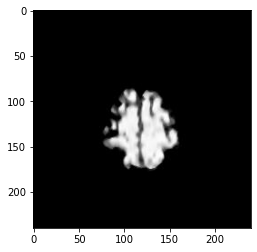

In [13]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("C:/Users/shiva/OneDrive/Documents/Qn3_Braintumor/Brain Tumor/Image5.jpg")
imgplot = plt.imshow(img)
plt.show()

## Brain image with tumour

Populating the interactive namespace from numpy and matplotlib


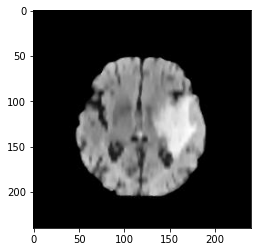

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("C:/Users/shiva/OneDrive/Documents/Qn3_Braintumor/Brain Tumor/Image3.jpg")
imgplot = plt.imshow(img)
plt.show()

In [23]:
import os
import shutil

path = "C:/Users/shiva/OneDrive/Documents/Qn3_Braintumor/BrainTumor"
tum = "C:/Users/shiva/OneDrive/Documents/Qn3_Braintumor/Data/Tumor"

for i in range(len(tumor)):
    if os.path.isfile(path + "/" + tumor[i] + ".jpg"):
        im = path + "/" + tumor[i] + ".jpg"
        shutil.move(im, tum)


In [29]:
nom = "C:/Users/shiva/OneDrive/Documents/Qn3_Braintumor/Data/Normal"
for i in range(len(normal)):
    if os.path.isfile(path + "/" + normal[i] + ".jpg"):
        im = path + "/" + normal[i] + ".jpg"
        shutil.move(im, nom)

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [36]:
DIR = r"C:/Users/shiva/OneDrive/Documents/Qn3_Braintumor/Data"
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

generator = datagen.flow_from_directory(
    DIR,
    target_size=(150,150),
    class_mode = 'binary')

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(generator,epochs=20,steps_per_epoch=100)
scores = model.evaluate(generator)
print(f"\n{model.metrics_names[1]}: {scores[1]*100}%")

Found 3762 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 137s 1s/step - loss: 0.5490 - accuracy: 0.7044
Epoch 2/10
100/100 [==============================] - 123s 1s/step - loss: 0.4885 - accuracy: 0.7643
Epoch 3/10
100/100 [==============================] - 118s 1s/step - loss: 0.4438 - accuracy: 0.7966
Epoch 4/10
100/100 [==============================] - 97s 961ms/step - loss: 0.4235 - accuracy: 0.8145
Epoch 5/10
100/100 [==============================] - 94s 941ms/step - loss: 0.4238 - accuracy: 0.8038
Epoch 6/10
100/100 [==============================] - 103s 1s/step - loss: 0.4220 - accuracy: 0.8132
Epoch 7/10
100/100 [==============================] - 99s 991ms/step - loss: 0.3918 - accuracy: 0.8241
Epoch 8/10
100/100 [==============================] - 101s 1s/step - loss: 0.3780 - accuracy: 0.8352
Epoch 9/10
100/100 [==============================] - 94s 932ms/step - loss: 0.3846 - accuracy: 0.8297
Epoch 10/10
118/118 [====================